<a href="https://colab.research.google.com/github/SathvikCholleti/-Stock-Market-Volatility-Based-on-Time-Series-Data/blob/main/AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import _strptime
import yfinance as yf


In [ ]:
history=yf.download('SBIN.NS',start='2000-01-01',end='2024-09-09',interval='1d')
display(history)


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,22.267092,22.988886,22.101974,22.988886,15.844798,25152894
2000-01-04,22.988886,24.720245,22.535995,24.446625,16.849527,47648560
2000-01-05,23.493668,24.974997,23.116261,23.441774,16.156946,36396207
2000-01-06,23.776726,25.286358,23.776726,24.625893,16.973080,70573968
2000-01-07,24.673071,26.409147,24.059780,25.786425,17.772966,83453217
...,...,...,...,...,...,...
2024-09-02,817.299988,825.400024,813.049988,822.150024,822.150024,11813750
2024-09-03,822.150024,825.950012,816.400024,824.799988,824.799988,10548350
2024-09-04,815.450012,818.650024,813.650024,816.500000,816.500000,10789570


# New Section

In [ ]:
history=history.loc[:,['Open','Close','Volume']]
display(history)

,Open,Close,Volume
Date,,,
2000-01-03,22.267092,22.988886,25152894
2000-01-04,22.988886,24.446625,47648560
2000-01-05,23.493668,23.441774,36396207
2000-01-06,23.776726,24.625893,70573968
2000-01-07,24.673071,25.786425,83453217
...,...,...,...
2024-09-02,817.299988,822.150024,11813750
2024-09-03,822.150024,824.799988,10548350
2024-09-04,815.450012,816.500000,10789570


In [ ]:
history['prev_close']=history.loc[:,'Close'].shift(2)
history['prev_volume']=history.loc[:,'Volume'].shift(2)
display(history)

,Open,Close,Volume,prev_close,prev_volume
Date,,,,,
2000-01-03,22.267092,22.988886,25152894,NaN,NaN
2000-01-04,22.988886,24.446625,47648560,NaN,NaN
2000-01-05,23.493668,23.441774,36396207,22.988886,25152894.0
2000-01-06,23.776726,24.625893,70573968,24.446625,47648560.0
2000-01-07,24.673071,25.786425,83453217,23.441774,36396207.0
...,...,...,...,...,...
2024-09-02,817.299988,822.150024,11813750,814.500000,18247268.0
2024-09-03,822.150024,824.799988,10548350,815.599976,8911426.0
2024-09-04,815.450012,816.500000,10789570,822.150024,11813750.0


In [ ]:
datetimes=history.index.values
weekdays=[]
for dt in datetimes:
  dt=datetime.strptime(str(dt),'%Y-%m-%dT%H:%M:%S.000000000')
  weekdays.append(dt.weekday())
history['weekday']=weekdays
display(history)

,Open,Close,Volume,prev_close,prev_volume,weekday
Date,,,,,,
2000-01-03,22.267092,22.988886,25152894,NaN,NaN,0
2000-01-04,22.988886,24.446625,47648560,NaN,NaN,1
2000-01-05,23.493668,23.441774,36396207,22.988886,25152894.0,2
2000-01-06,23.776726,24.625893,70573968,24.446625,47648560.0,3
2000-01-07,24.673071,25.786425,83453217,23.441774,36396207.0,4
...,...,...,...,...,...,...
2024-09-02,817.299988,822.150024,11813750,814.500000,18247268.0,0
2024-09-03,822.150024,824.799988,10548350,815.599976,8911426.0,1
2024-09-04,815.450012,816.500000,10789570,822.150024,11813750.0,2


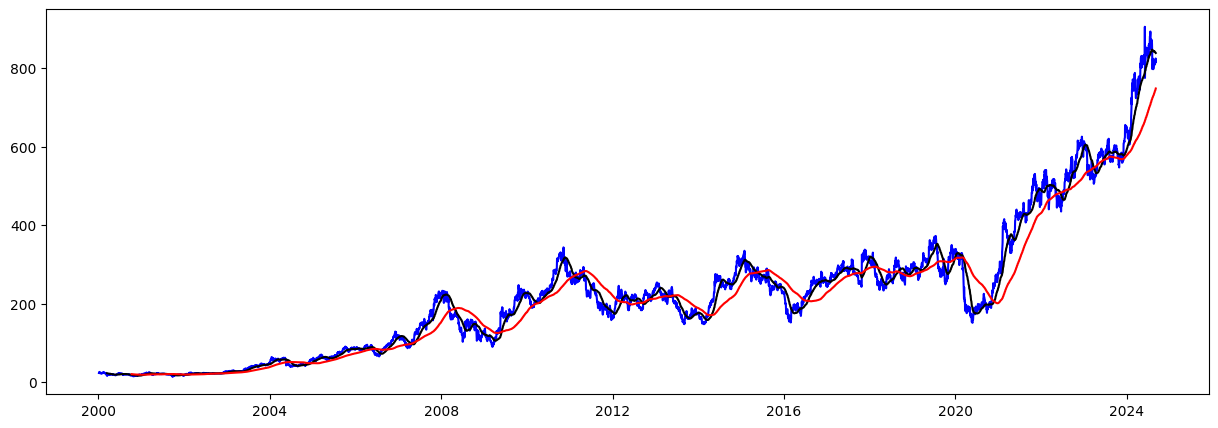

In [ ]:
history['9SMA']=history['prev_close'].rolling(9).mean()
history['20SMA']=history['prev_close'].rolling(20).mean()
history['50SMA']=history['prev_close'].rolling(50).mean()
history['100SMA']=history['prev_close'].rolling(100).mean()
history['200SMA']=history['prev_close'].rolling(200).mean()
x=history.index.values

plt.figure(figsize=(15,5))
plt.plot(x,history['prev_close'],color='blue')

plt.plot(x,history['50SMA'],color='black')

plt.plot(x,history['200SMA'],color='red')

plt.show()

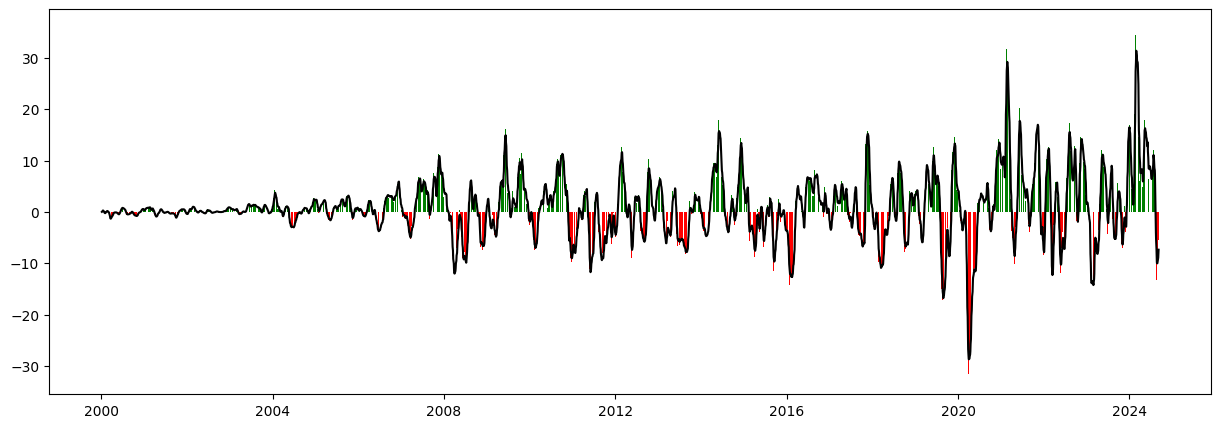

In [ ]:
def calc_macd(data,len1,len2,len3):
  shortEMA=data.ewm(span=len1,adjust=False).mean()
  longEMA=data.ewm(span=len2,adjust=False).mean()
  MACD =shortEMA - longEMA
  signal =MACD.ewm(span=len3,adjust=False).mean()
  return MACD,signal
MACD,signal=calc_macd(history['prev_close'],12,26,9)
history['MACD']=MACD
history['MACD_signal']=signal


x=history.index.values

plt.figure(figsize=(15,5))
colors=np.array(['green']*len(history['MACD']))
colors[history['MACD']<0]='red'
plt.bar(x,history['MACD'],color=colors)
plt.plot(x,history['MACD_signal'],color='black')
plt.show()





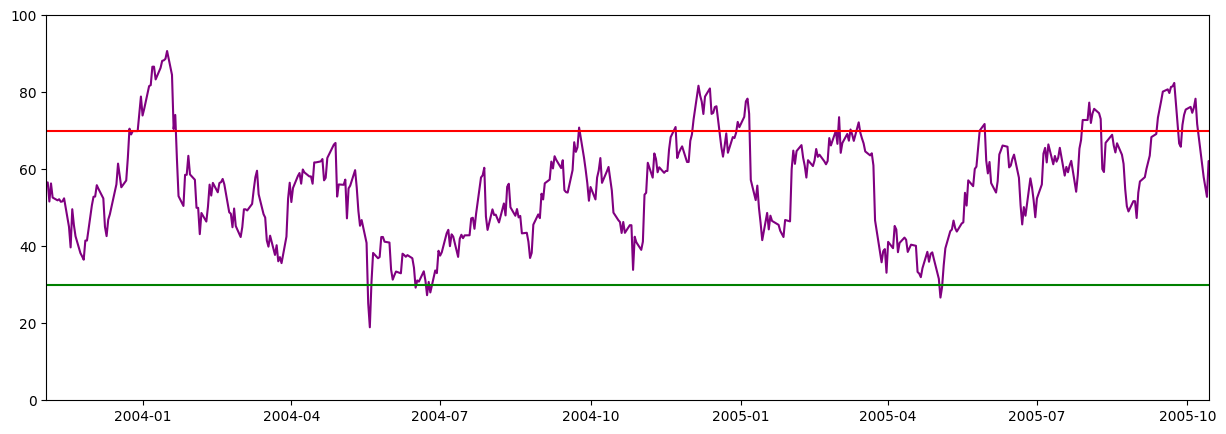

In [ ]:
def calc_rsi(data,period):
  delta =data.diff()
  up=delta.clip(lower=0)
  down=-1*delta.clip(upper=0)
  ema_up=up.ewm(com=period,adjust=False).mean()
  ema_down=down.ewm(com=period,adjust=False).mean()

  rs=ema_up/ema_down
  rsi=100-(100/(1+rs))
  return rsi

history['RSI']=calc_rsi(history['prev_close'],13)
history['RSI_volume']=calc_rsi(history['prev_volume'],13)

plt.figure(figsize=(15,5))
plt.plot(x,history['RSI'],color='purple')
plt.plot([x[0],x[-1]],[70,70],color='red')
plt.plot([x[0],x[-1]],[30,30],color='green')
plt.xlim(x[1000],x[1500])
plt.ylim(0,100)
plt.show()






In [ ]:
display(history)

,Open,Close,Volume,prev_close,prev_volume,weekday,9SMA,20SMA,50SMA,100SMA,200SMA,MACD,MACD_signal,RSI,RSI_volume
Date,,,,,,,,,,,,,,,
2000-01-03,22.267092,22.988886,25152894,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,22.988886,24.446625,47648560,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,23.493668,23.441774,36396207,22.988886,25152894.0,2,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
2000-01-06,23.776726,24.625893,70573968,24.446625,47648560.0,3,NaN,NaN,NaN,NaN,NaN,0.116287,0.023257,100.000000,100.000000
2000-01-07,24.673071,25.786425,83453217,23.441774,36396207.0,4,NaN,NaN,NaN,NaN,NaN,0.125911,0.043788,94.964533,96.294863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-02,817.299988,822.150024,11813750,814.500000,18247268.0,0,815.561110,816.307498,840.549999,823.858499,743.46425,-8.301577,-9.230417,44.607534,53.753781
2024-09-03,822.150024,824.799988,10548350,815.599976,8911426.0,1,815.772217,813.954996,839.809999,824.303998,744.65150,-7.730107,-8.930355,45.232171,46.404245
2024-09-04,815.450012,816.500000,10789570,822.150024,11813750.0,2,815.977776,812.669998,839.377999,824.932499,745.89050,-6.671772,-8.478638,48.925576,48.750202


In [ ]:
labels=['prev_close','prev_volume','weekday','200SMA','9SMA','20SMA','50SMA','100SMA','MACD','MACD_signal','RSI','RSI_volume']
period =1
new_labels=[str(period)+'d'+label for label in labels]
history[new_labels]=history[labels].pct_change(period,fill_method='ffill')

period =2
new_labels=[str(period)+'d'+label for label in labels]
history[new_labels]=history[labels].pct_change(period,fill_method='ffill')

period =5
new_labels=[str(period)+'d'+label for label in labels]
history[new_labels]=history[labels].pct_change(period,fill_method='ffill')

period =10
new_labels=[str(period)+'d'+label for label in labels]
history[new_labels]=history[labels].pct_change(period,fill_method='ffill')

display(history)

<ipython-input-10-cad681c8a597>:4: FutureWarning: The 'fill_method' keyword being not None and the 'limit' keyword in DataFrame.pct_change are deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  history[new_labels]=history[labels].pct_change(period,fill_method='ffill')
<ipython-input-10-cad681c8a597>:8: FutureWarning: The 'fill_method' keyword being not None and the 'limit' keyword in DataFrame.pct_change are deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  history[new_labels]=history[labels].pct_change(period,fill_method='ffill')
<ipython-input-10-cad681c8a597>:12: FutureWarning: The 'fill_method' keyword being not None and the 'limit' keyword in DataFrame.pct_change are deprecated and will be removed in a future version. Either fill in a

,Open,Close,Volume,prev_close,prev_volume,weekday,9SMA,20SMA,50SMA,100SMA,...,10dweekday,10d200SMA,10d9SMA,10d20SMA,10d50SMA,10d100SMA,10dMACD,10dMACD_signal,10dRSI,10dRSI_volume
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,22.267092,22.988886,25152894,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,22.988886,24.446625,47648560,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,23.493668,23.441774,36396207,22.988886,25152894.0,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,23.776726,24.625893,70573968,24.446625,47648560.0,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,24.673071,25.786425,83453217,23.441774,36396207.0,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-02,817.299988,822.150024,11813750,814.500000,18247268.0,0,815.561110,816.307498,840.549999,823.858499,...,NaN,0.017319,0.003925,-0.032659,-0.002235,0.008813,-0.374137,0.282980,0.162294,0.152920
2024-09-03,822.150024,824.799988,10548350,815.599976,8911426.0,1,815.772217,813.954996,839.809999,824.303998,...,0.0,0.017266,0.009120,-0.030769,-0.003986,0.008357,-0.408934,0.066787,0.073896,0.000262
2024-09-04,815.450012,816.500000,10789570,822.150024,11813750.0,2,815.977776,812.669998,839.377999,824.932499,...,0.0,0.017218,0.009089,-0.027921,-0.005064,0.008017,-0.472832,-0.081224,0.143723,0.070711


In [ ]:
history = history.replace(np.inf,np.nan).dropna()

In [ ]:
display(history)

,Open,Close,Volume,prev_close,prev_volume,weekday,9SMA,20SMA,50SMA,100SMA,...,10dweekday,10d200SMA,10d9SMA,10d20SMA,10d50SMA,10d100SMA,10dMACD,10dMACD_signal,10dRSI,10dRSI_volume
Date,,,,,,,,,,,,,,,,,,,,,
2000-10-26,14.638725,15.001981,1581533,14.695337,3484872.0,3,15.233668,15.888654,17.642330,19.102994,...,0.000000,-0.020763,-0.072213,-0.085020,-0.040059,-0.016637,0.121096,0.196222,-0.244461,-0.016107
2000-10-27,15.072745,14.959522,3296662,14.832147,6398343.0,4,15.117300,15.778498,17.558828,19.054261,...,0.000000,-0.020953,-0.074098,-0.081936,-0.041162,-0.018550,0.081342,0.170793,-0.000753,0.108800
2000-11-02,16.360651,16.275734,12974996,15.402977,8213427.0,3,14.967909,15.466665,17.272469,18.826590,...,0.000000,-0.018766,-0.059174,-0.067018,-0.042492,-0.025458,-0.169867,0.020918,0.934108,0.147123
2000-11-03,16.285170,16.492744,19298344,16.374804,25579328.0,4,15.116776,15.463362,17.223123,18.782103,...,0.000000,-0.017979,-0.041543,-0.057887,-0.040808,-0.025627,-0.371756,-0.064412,1.844491,0.505985
2000-11-09,16.488026,16.355932,6546235,16.374804,8292927.0,3,15.792442,15.496386,17.031211,18.564810,...,0.000000,-0.016950,0.036680,-0.024689,-0.034639,-0.028173,-0.816975,-0.456136,1.615552,0.047908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-23,821.500000,815.349976,5537747,815.549988,14607257.0,4,811.905545,830.769998,843.428999,819.924498,...,0.333333,0.016556,-0.044517,-0.034659,-0.003436,0.007853,1.441037,-3.624194,0.379247,-0.018784
2024-08-29,809.549988,814.500000,18247268,815.900024,12833290.0,3,814.583327,822.372498,841.753999,822.866498,...,0.500000,0.017139,-0.015391,-0.034709,-0.004009,0.009175,-0.165025,1.406673,0.114525,-0.003924
2024-08-30,817.150024,815.599976,8911426,809.400024,10371300.0,4,815.294440,819.202499,841.157999,823.377499,...,0.000000,0.017263,-0.004524,-0.033677,-0.003941,0.009103,-0.289438,0.666809,0.157026,-0.062986


x_train shape: (1778, 61), y_train shape: (1778,)
x_val shape: (198, 61), y_val shape: (198,)
x_test shape: (494, 61), y_test shape: (494,)


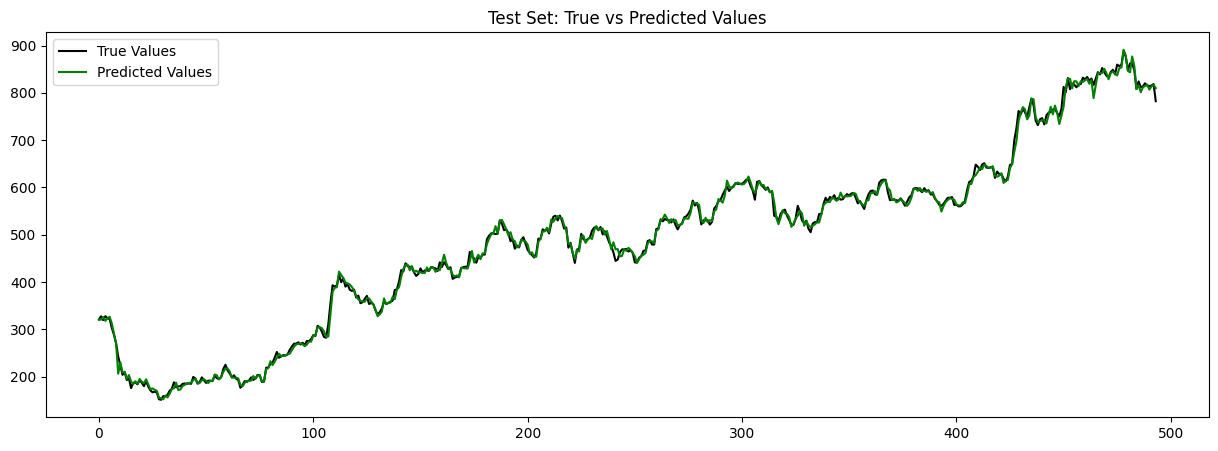

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming `history` is a DataFrame with 'Close' as the target variable and other columns as features
y = history['Close']
x = history.drop(['Close', 'Volume'], axis=1).values

# Split data into training+validation and test sets (80% training+validation, 20% test)
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

# Split training+validation into training and validation sets (80% training, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.1, shuffle=False)

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

# Initialize and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict on validation and test sets
y_val_pred = model.predict(x_val)
y_test_pred = model.predict(x_test)

# Plot predictions against true values for the test set
plt.figure(figsize=(15, 5))
plt.plot(range(len(y_test)), y_test, 'black', label='True Values')
plt.plot(range(len(y_test_pred)), y_test_pred, 'green', label='Predicted Values')
plt.title('Test Set: True vs Predicted Values')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE): ", mse)
print("R-squared (R2) Score: ", r2)
print("Mean Absolute Error (MAE): ", mae)
print("Root Mean Squared Error (RMSE): ", rmse)

NameError: name 'pred' is not defined

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0669 - val_loss: 0.0041
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017 - val_loss: 0.0037
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017 - val_loss: 0.0040
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0016 - val_loss: 0.0038
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015 - val_loss: 0.0034
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015 - val_loss: 0.0036
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0015 - val_loss: 0.0038
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0014 - val_loss: 0.0031
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0015 - val_loss: 0.0031
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0015 - val_loss: 0.0029
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013 - val_loss: 0.0031
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0

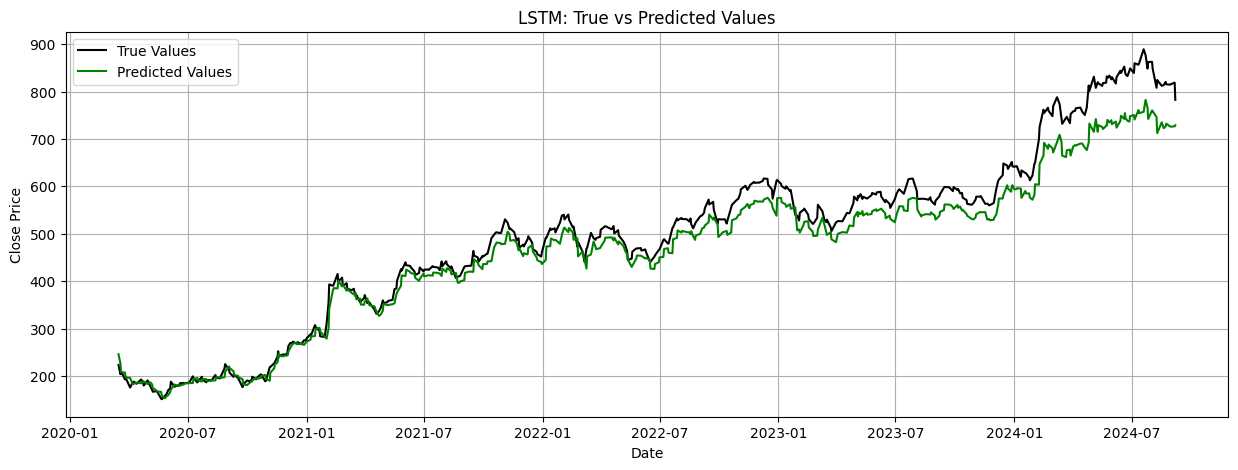

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming `history` is a DataFrame with 'Close' as the target variable
y = history['Close'].values
x = history.drop(['Close', 'Volume'], axis=1).values

# Split data into training+validation and test sets (80% training+validation, 20% test)
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

# Split training+validation into training and validation sets (80% training, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.1, shuffle=False)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
y_train = scaler.fit_transform(y_train.reshape(-1, 1))
y_val = scaler.transform(y_val.reshape(-1, 1))
y_test = scaler.transform(y_test.reshape(-1, 1))

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

time_step = 10  # Number of previous time steps to use
X_train, y_train = create_dataset(y_train, time_step)
X_val, y_val = create_dataset(y_val, time_step)
X_test, y_test = create_dataset(y_test, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))  # Input layer
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Predict
y_test_pred = model.predict(X_test)

# Inverse transform predictions
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test_actual = scaler.inverse_transform(y_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test_actual, y_test_pred))
print(f'LSTM - RMSE: {rmse}')

# Plot
plt.figure(figsize=(15, 5))
plt.plot(history.index[-len(y_test_actual):], y_test_actual, 'black', label='True Values')
plt.plot(history.index[-len(y_test_pred):], y_test_pred, 'green', label='Predicted Values')
plt.title('LSTM: True vs Predicted Values')
plt.xlabel('Date')  # Optional
plt.ylabel('Close Price')  # Optional
plt.legend()
plt.grid()
plt.show()


In [ ]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.8 MB/s eta 0:00:00


In [ ]:
from keras_tuner import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(time_step, 1)))
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=100, step=10), return_sequences=True))
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=100, step=10)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Set up Keras Tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_tuning'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]


Trial 5 Complete [00h 01m 05s]
val_loss: 0.0007701658760197461

Best val_loss So Far: 0.0007642832351848483
Total elapsed time: 00h 06m 03s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Tuned LSTM - RMSE: 27.92930746859841


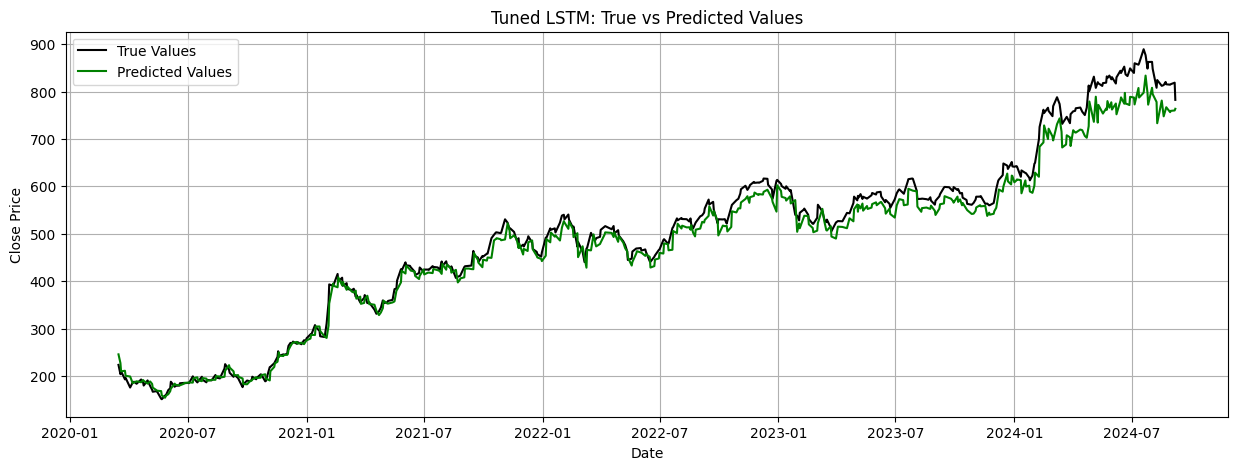

In [ ]:
# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)

# Inverse transform predictions
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test_actual = scaler.inverse_transform(y_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, y_test_pred))
print(f'Tuned LSTM - RMSE: {rmse}')

# Plot
plt.figure(figsize=(15, 5))
plt.plot(history.index[-len(y_test_actual):], y_test_actual, 'black', label='True Values')
plt.plot(history.index[-len(y_test_pred):], y_test_pred, 'green', label='Predicted Values')
plt.title('Tuned LSTM: True vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()


# New Section